## Work
請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
# Hint 1 : 在 Dense 層中增加 Regularizers
# Hint 2 : 增加 Dropout 層並設定 dropout ratio 
# Hint 3 : 增加 Batch-normalization 層
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.regularizers import l1
from keras import optimizers
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128],Regu_rate=1e-4,drp_ratio=0.2):
    
    model = Sequential()
    model.add(Dense(units = input_shape[1] ,input_dim = input_shape[1], kernel_initializer = 'normal', activation = 'relu',name = 'input'))
    
    for i, n_units in enumerate(num_neurons):
        model.add(Dense(units=n_units, kernel_initializer='normal', activation='relu',name="hidden_layer"+str(i+1), kernel_regularizer=l1(Regu_rate)))  
        model.add(Dropout(drp_ratio))  
        model.add(BatchNormalization())         
    
    model.add(Dense(units=output_units,kernel_initializer='normal', activation='softmax',name='output'))

    return model

In [7]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [512,1024]
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-8]
Dropout_EXP = [0.2,0.4]

In [8]:
#results = {}
"""
Write your training loop and record results
"""
results = {}

for regu_rate,drop_rate,batch_size in itertools.product(L1_EXP,Dropout_EXP,BATCH_SIZE):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape,Regu_rate=regu_rate,drp_ratio=drop_rate)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = f'L1:{str(regu_rate)},DR: {str(drop_rate)},BS:{str(batch_size)}'
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3072)              9440256   
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)  

50000/50000 [==============================] - 38s 755us/step - loss: 2.1596 - acc: 0.3991 - val_loss: 2.1130 - val_acc: 0.4181
Epoch 40/50
50000/50000 [==============================] - 38s 760us/step - loss: 2.1447 - acc: 0.4018 - val_loss: 2.1183 - val_acc: 0.4227
Epoch 41/50
50000/50000 [==============================] - 39s 778us/step - loss: 2.1432 - acc: 0.4037 - val_loss: 2.1130 - val_acc: 0.4163
Epoch 42/50
50000/50000 [==============================] - 39s 778us/step - loss: 2.1385 - acc: 0.4052 - val_loss: 2.1349 - val_acc: 0.4141
Epoch 43/50
50000/50000 [==============================] - 39s 789us/step - loss: 2.1327 - acc: 0.4067 - val_loss: 2.1441 - val_acc: 0.4258
Epoch 44/50
50000/50000 [==============================] - 39s 774us/step - loss: 2.1245 - acc: 0.4085 - val_loss: 2.0678 - val_acc: 0.4369
Epoch 45/50
50000/50000 [==============================] - 38s 769us/step - loss: 2.1250 - acc: 0.4097 - val_loss: 2.0581 - val_acc: 0.4454
Epoch 46/50
50000/50000 [=======

50000/50000 [==============================] - 33s 658us/step - loss: 2.2062 - acc: 0.3752 - val_loss: 2.5799 - val_acc: 0.2606
Epoch 35/50
50000/50000 [==============================] - 34s 682us/step - loss: 2.1989 - acc: 0.3757 - val_loss: 2.8943 - val_acc: 0.1892
Epoch 36/50
50000/50000 [==============================] - 37s 742us/step - loss: 2.2014 - acc: 0.3732 - val_loss: 2.2880 - val_acc: 0.3430
Epoch 37/50
50000/50000 [==============================] - 36s 725us/step - loss: 2.1780 - acc: 0.3798 - val_loss: 2.2678 - val_acc: 0.3530
Epoch 38/50
50000/50000 [==============================] - 34s 680us/step - loss: 2.1763 - acc: 0.3825 - val_loss: 2.1649 - val_acc: 0.3939
Epoch 39/50
50000/50000 [==============================] - 34s 679us/step - loss: 2.1838 - acc: 0.3798 - val_loss: 2.7491 - val_acc: 0.2242
Epoch 40/50
50000/50000 [==============================] - 33s 661us/step - loss: 2.1738 - acc: 0.3859 - val_loss: 2.2661 - val_acc: 0.3422
Epoch 41/50
50000/50000 [=======

50000/50000 [==============================] - 38s 754us/step - loss: 2.3255 - acc: 0.2836 - val_loss: 2.3147 - val_acc: 0.3120
Epoch 30/50
50000/50000 [==============================] - 38s 755us/step - loss: 2.3262 - acc: 0.2841 - val_loss: 2.3949 - val_acc: 0.2439
Epoch 31/50
50000/50000 [==============================] - 38s 752us/step - loss: 2.3220 - acc: 0.2852 - val_loss: 2.3203 - val_acc: 0.3172
Epoch 32/50
50000/50000 [==============================] - 38s 753us/step - loss: 2.3251 - acc: 0.2900 - val_loss: 2.2811 - val_acc: 0.3459
Epoch 33/50
50000/50000 [==============================] - 38s 754us/step - loss: 2.3205 - acc: 0.2890 - val_loss: 2.4822 - val_acc: 0.2311
Epoch 34/50
50000/50000 [==============================] - 38s 752us/step - loss: 2.3159 - acc: 0.2920 - val_loss: 2.3272 - val_acc: 0.3250
Epoch 35/50
50000/50000 [==============================] - 38s 753us/step - loss: 2.3157 - acc: 0.2922 - val_loss: 2.3250 - val_acc: 0.3203
Epoch 36/50
50000/50000 [=======

50000/50000 [==============================] - 33s 670us/step - loss: 2.4322 - acc: 0.2748 - val_loss: 2.5556 - val_acc: 0.2261
Epoch 25/50
50000/50000 [==============================] - 34s 672us/step - loss: 2.4129 - acc: 0.2717 - val_loss: 2.7693 - val_acc: 0.1732
Epoch 26/50
50000/50000 [==============================] - 33s 669us/step - loss: 2.3802 - acc: 0.2751 - val_loss: 2.7519 - val_acc: 0.1441
Epoch 27/50
50000/50000 [==============================] - 34s 671us/step - loss: 2.3801 - acc: 0.2759 - val_loss: 2.3593 - val_acc: 0.2944
Epoch 28/50
50000/50000 [==============================] - 34s 670us/step - loss: 2.3670 - acc: 0.2791 - val_loss: 2.4097 - val_acc: 0.3105
Epoch 29/50
50000/50000 [==============================] - 33s 666us/step - loss: 2.3602 - acc: 0.2861 - val_loss: 2.3920 - val_acc: 0.2565
Epoch 30/50
50000/50000 [==============================] - 33s 665us/step - loss: 2.3549 - acc: 0.2846 - val_loss: 2.6305 - val_acc: 0.2050
Epoch 31/50
50000/50000 [=======

50000/50000 [==============================] - 38s 763us/step - loss: 1.4785 - acc: 0.4688 - val_loss: 1.4492 - val_acc: 0.4815
Epoch 20/50
50000/50000 [==============================] - 38s 766us/step - loss: 1.4640 - acc: 0.4764 - val_loss: 1.4456 - val_acc: 0.4822
Epoch 21/50
50000/50000 [==============================] - 38s 768us/step - loss: 1.4543 - acc: 0.4766 - val_loss: 1.4332 - val_acc: 0.4905
Epoch 22/50
50000/50000 [==============================] - 38s 768us/step - loss: 1.4411 - acc: 0.4836 - val_loss: 1.4302 - val_acc: 0.4883
Epoch 23/50
50000/50000 [==============================] - 38s 767us/step - loss: 1.4330 - acc: 0.4828 - val_loss: 1.4251 - val_acc: 0.4896
Epoch 24/50
50000/50000 [==============================] - 39s 771us/step - loss: 1.4218 - acc: 0.4895 - val_loss: 1.4266 - val_acc: 0.4895
Epoch 25/50
50000/50000 [==============================] - 39s 771us/step - loss: 1.4105 - acc: 0.4946 - val_loss: 1.4172 - val_acc: 0.4930
Epoch 26/50
50000/50000 [=======

50000/50000 [==============================] - 33s 667us/step - loss: 1.6714 - acc: 0.4026 - val_loss: 1.6046 - val_acc: 0.4264
Epoch 15/50
50000/50000 [==============================] - 33s 666us/step - loss: 1.6543 - acc: 0.4074 - val_loss: 1.5944 - val_acc: 0.4312
Epoch 16/50
50000/50000 [==============================] - 33s 669us/step - loss: 1.6426 - acc: 0.4122 - val_loss: 1.5831 - val_acc: 0.4348
Epoch 17/50
50000/50000 [==============================] - 33s 666us/step - loss: 1.6290 - acc: 0.4169 - val_loss: 1.5713 - val_acc: 0.4395
Epoch 18/50
50000/50000 [==============================] - 34s 671us/step - loss: 1.6182 - acc: 0.4203 - val_loss: 1.5599 - val_acc: 0.4449
Epoch 19/50
50000/50000 [==============================] - 34s 678us/step - loss: 1.6116 - acc: 0.4219 - val_loss: 1.5480 - val_acc: 0.4464
Epoch 20/50
50000/50000 [==============================] - 33s 669us/step - loss: 1.5968 - acc: 0.4277 - val_loss: 1.5442 - val_acc: 0.4496
Epoch 21/50
50000/50000 [=======

50000/50000 [==============================] - 39s 775us/step - loss: 1.8289 - acc: 0.3334 - val_loss: 1.7538 - val_acc: 0.3670
Epoch 10/50
50000/50000 [==============================] - 39s 772us/step - loss: 1.8116 - acc: 0.3412 - val_loss: 1.7141 - val_acc: 0.3841
Epoch 11/50
50000/50000 [==============================] - 39s 775us/step - loss: 1.7940 - acc: 0.3476 - val_loss: 1.7205 - val_acc: 0.3794
Epoch 12/50
50000/50000 [==============================] - 39s 782us/step - loss: 1.7734 - acc: 0.3601 - val_loss: 1.6872 - val_acc: 0.3857
Epoch 13/50
50000/50000 [==============================] - 39s 779us/step - loss: 1.7587 - acc: 0.3622 - val_loss: 1.6675 - val_acc: 0.4019
Epoch 14/50
50000/50000 [==============================] - 39s 775us/step - loss: 1.7435 - acc: 0.3690 - val_loss: 1.6541 - val_acc: 0.3996
Epoch 15/50
50000/50000 [==============================] - 39s 774us/step - loss: 1.7328 - acc: 0.3711 - val_loss: 1.6441 - val_acc: 0.4035
Epoch 16/50
50000/50000 [=======

50000/50000 [==============================] - 33s 658us/step - loss: 2.1182 - acc: 0.2264 - val_loss: 2.0217 - val_acc: 0.2688
Epoch 5/50
50000/50000 [==============================] - 33s 659us/step - loss: 2.0669 - acc: 0.2467 - val_loss: 1.9742 - val_acc: 0.2883
Epoch 6/50
50000/50000 [==============================] - 33s 656us/step - loss: 2.0235 - acc: 0.2591 - val_loss: 1.9526 - val_acc: 0.2982
Epoch 7/50
50000/50000 [==============================] - 33s 658us/step - loss: 1.9890 - acc: 0.2717 - val_loss: 1.9228 - val_acc: 0.3085
Epoch 8/50
50000/50000 [==============================] - 33s 660us/step - loss: 1.9615 - acc: 0.2817 - val_loss: 1.8978 - val_acc: 0.3171
Epoch 9/50
50000/50000 [==============================] - 33s 655us/step - loss: 1.9373 - acc: 0.2954 - val_loss: 1.8683 - val_acc: 0.3283
Epoch 10/50
50000/50000 [==============================] - 33s 655us/step - loss: 1.9198 - acc: 0.3031 - val_loss: 1.8437 - val_acc: 0.3408
Epoch 11/50
50000/50000 [============

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
Plot results
"""
def plot_model_score(results):
    
    NUM_COLORS = len(results.keys())
    cm = plt.get_cmap('gist_rainbow')
    color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
    
    plt.figure(figsize=(10,8))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label='train-'+cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label='valid-'+cond, color=color_bar[i])
    plt.title("Loss")
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()


    plt.figure(figsize=(10,8))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label='train-'+cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label='valid-'+cond, color=color_bar[i])
    plt.title("Accuracy")
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

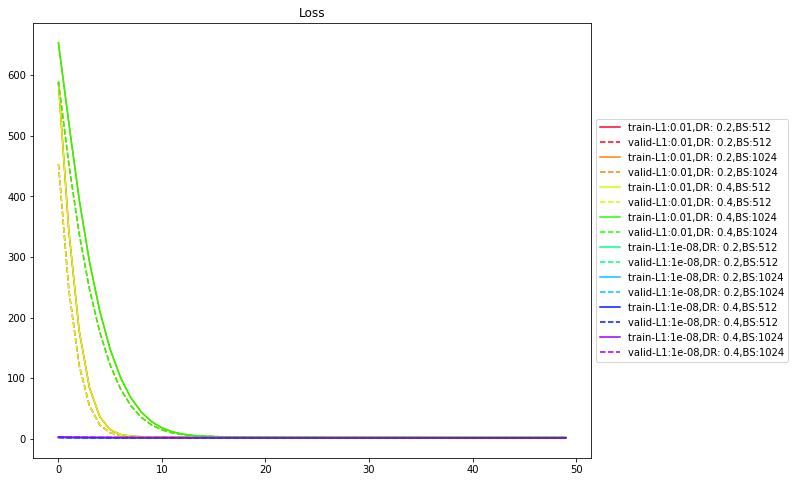

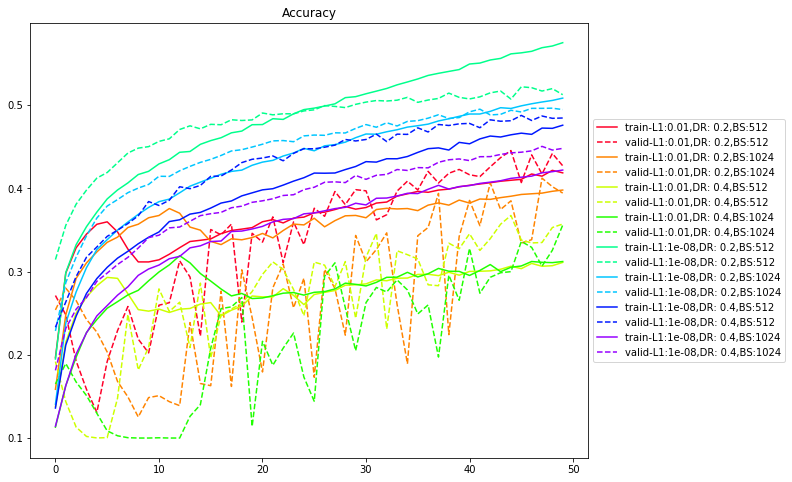

In [10]:
plot_model_score(results)